<a href="https://colab.research.google.com/github/TuanBuiDucVolsu/Nir_2021_spring/blob/BaiTapLon2021/%D0%9D%D0%98%D0%A0_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/НИР_Осень21/Data.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [ ]:
data.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [ ]:
# check missing values
data.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [ ]:
data_group_by_country = data.groupby(by='Country').count().reset_index('Country').rename(columns={'AverageTemperature':'Avg_Temperature_Count'}).rename(columns={'AverageTemperatureUncertainty':'Avg_Temperature_Uncertainty_Count'})

In [ ]:
import plotly.express as px
graph = px.bar(data_group_by_country , x ='Country', y = 'Avg_Temperature_Count' )
graph.show()

In [ ]:
graph2 = px.bar(data_group_by_country, x ='Country', y='Avg_Temperature_Count')
graph2.show()

In [ ]:
data_group_by_country.describe()

,dt,Avg_Temperature_Count,Avg_Temperature_Uncertainty_Count
count,243.000000,243.000000,243.000000
mean,2376.386831,2242.020576,2245.061728
std,556.877457,581.261278,571.330975
min,764.000000,0.000000,739.000000
25%,1965.000000,1862.500000,1862.500000
50%,2277.000000,2086.000000,2086.000000
75%,2761.500000,2532.500000,2532.500000
max,3239.000000,3166.000000,3166.000000


In [ ]:
fig1 = px.histogram(data_group_by_country, x ='Avg_Temperature_Count')
fig1.show()

In [ ]:
fig2 = px.histogram(data_group_by_country, x = 'Avg_Temperature_Uncertainty_Count')
fig2.show()

In [ ]:
country_less_data = data_group_by_country[(data_group_by_country['Avg_Temperature_Count'] < 1500) | (data_group_by_country['Avg_Temperature_Uncertainty_Count'] < 1500)]

In [ ]:
country_less_data

,Country,dt,Avg_Temperature_Count,Avg_Temperature_Uncertainty_Count
8,Antarctica,764,0,739
73,Federated States Of Micronesia,1427,1364,1364
80,French Southern And Antarctic Lands,788,783,783
91,Guam,1329,1328,1328
98,Heard Island And Mcdonald Islands,788,783,783
161,Northern Mariana Islands,1329,1328,1328
204,South Georgia And The South Sandwich Isla,1666,1474,1474


In [ ]:
list_country_less_data = country_less_data.index.tolist()

In [ ]:
list_country_less_data

[8, 73, 80, 91, 98, 161, 204]

In [ ]:
# remove countries with less data
data = data[~data['Country'].isin(country_less_data)]

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
# fill the missing values by doing rolling average on past 730 days
data['AverageTemperature'] = data['AverageTemperature'].fillna(data['AverageTemperature'].rolling(730, min_periods=1).mean())

In [ ]:
data['AverageTemperatureUncertainty'] = data['AverageTemperatureUncertainty'].fillna(data['AverageTemperatureUncertainty'].rolling(730, min_periods=1).mean())

In [ ]:
data.isnull().sum()

dt                                0
AverageTemperature               36
AverageTemperatureUncertainty     0
Country                           0
dtype: int64

In [ ]:
unique_countries = data.Country.unique()

In [ ]:
# check duplicate countries
duplicate = []
for i in unique_countries:
    if '(' in i:
        duplicate.append(i)
duplicate

['Congo (Democratic Republic Of The)',
 'Denmark (Europe)',
 'Falkland Islands (Islas Malvinas)',
 'France (Europe)',
 'Netherlands (Europe)',
 'United Kingdom (Europe)']

In [ ]:
data = data.replace(duplicate, ['Congo', 'Denmark','Falkland Islands','France','Netherlands','United Kingdom'])

In [ ]:
data.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'E

**Исследовательский анализ данных**

In [ ]:
countries = data['Country'].unique().tolist()
countries

['Åland',
 'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Baker Island',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 "Côte D'Ivoire",
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Europe',
 'Fa

In [ ]:
# get the mean temp for each country

mean_temp = []
for i in countries:
    mean_temp.append(data[data.Country == i]['AverageTemperature'].mean())

In [ ]:
mean_temp

[5.253407045650971,
 13.969032500999896,
 23.742513304859663,
 12.868059006848597,
 22.921618511348367,
 26.415697533490647,
 11.543420273585504,
 21.081856794478785,
 26.283285990972683,
 27.35062276593528,
 26.425329936633318,
 14.621407346072278,
 9.199305804976174,
 26.528234326993193,
 7.373470573259821,
 21.597363156755243,
 6.553616257515263,
 11.171363673433104,
 23.57770172333342,
 25.924235133962867,
 25.53470677532838,
 24.84190674998119,
 26.37128770995455,
 6.278468335904415,
 9.418498079857274,
 24.878248840314843,
 27.015074990382384,
 11.940860669269968,
 20.877428251970485,
 26.733766132051635,
 10.795574834946803,
 21.85136260006229,
 24.684769769733272,
 26.255617836936572,
 10.837889488469633,
 27.203972767337603,
 23.901255108822976,
 20.513229501055314,
 25.68400374912927,
 26.635809223381855,
 24.56038082215269,
 -1.6628978071506426,
 22.943871060047485,
 26.72250415028397,
 25.42359143874315,
 27.00171149623752,
 9.383679436640453,
 6.761933487452209,
 22.951896

In [ ]:
#@title
# plot the mean temperature of countries 

element_map = [ dict(type = 'choropleth', # type of map
              locations = countries, # location names
              z = mean_temp, # temperature of countries
              locationmode = 'country names')
       ]

layout = dict(title = 'Средние глобальные температуры',
              geo = dict(showframe = False,
                         showocean = True, 
                         oceancolor = 'blue',
                         projection = dict(type = 'orthographic'),
                         lonaxis = dict(showgrid=True, gridcolar='black'),
                         lataxis = dict(showgrid=True, gridcolar = 'black'))) 

fig = dict(data = element_map, layout = layout)
py.iplot(fig, validate = False, filename = 'worldmap')

In [ ]:
#@title
data['year'] = data['dt'].apply(lambda x: x.split('-')[0])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384000,2.294000,Åland,1743
1,1743-12-01,4.384000,2.294000,Åland,1743
2,1744-01-01,4.384000,2.294000,Åland,1744
3,1744-02-01,4.384000,2.294000,Åland,1744
4,1744-03-01,4.384000,2.294000,Åland,1744
...,...,...,...,...,...
577457,2013-05-01,19.059000,1.022000,Zimbabwe,2013
577458,2013-06-01,17.613000,0.473000,Zimbabwe,2013
577459,2013-07-01,17.000000,0.453000,Zimbabwe,2013
577460,2013-08-01,19.759000,0.717000,Zimbabwe,2013


In [ ]:
#@title
fig_changes = px.choropleth(data, locations = 'Country',
                    locationmode = 'country names', # locations 
                    color = 'AverageTemperature', # column representing the temperature
                    hover_name = "Country", # column to add to hover information
                    animation_frame = 'year', # timeframe for animation
                    color_continuous_scale = px.colors.sequential.deep_r)
##fig_changes.show()

In [ ]:
df_global = data.groupby('year').mean().reset_index()

In [ ]:
# most of the coutries have data after 1850
df_global['year'] = df_global['year'].apply(lambda x: int(x))
df_global = df_global[df_global['year']>1850]

In [ ]:
# Uncertainity upper bound 
trace1 = go.Scatter(
    x = df_global['year'], 
    y = np.array(df_global['AverageTemperature']) + np.array(df_global['AverageTemperatureUncertainty']), # Adding uncertinity
    name = 'Uncertainty top',
    line = dict(color = 'green'))

# Uncertainity lower bound
trace2 = go.Scatter(
    x = df_global['year'] , 
    y = np.array(df_global['AverageTemperature']) - np.array(df_global['AverageTemperatureUncertainty']), # Subtracting uncertinity
    fill = 'tonexty',
    name = 'Uncertainty bottom',
    line = dict(color = 'green'))

# Recorded temperature
trace3 = go.Scatter(
    x = df_global['year'] , 
    y = df_global['AverageTemperature'],
    name = 'Average Temperature',
    line = dict(color='blue'))

all_trace = [trace1, trace2, trace3]

layout = go.Layout(
    xaxis = dict(title = 'year'),
    yaxis = dict(title = 'Средняя температура, °C'),
    title = 'Средняя температура земли в мире',
    showlegend = False)

figure = go.Figure(data = all_trace, layout = layout)
py.iplot(figure)

In [ ]:
# модель для данных по России
Vietnam_df = data[data['Country'] == 'Vietnam'].reset_index(drop = True)
Vietnam_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1825-01-01,19.53900,2.026000,Vietnam,1825
1,1825-02-01,19.79700,1.533000,Vietnam,1825
2,1825-03-01,22.17600,1.955000,Vietnam,1825
3,1825-04-01,25.19700,2.123000,Vietnam,1825
4,1825-05-01,26.23500,1.358000,Vietnam,1825
...,...,...,...,...,...
2260,2013-05-01,27.44300,0.389000,Vietnam,2013
2261,2013-06-01,27.62300,0.299000,Vietnam,2013
2262,2013-07-01,27.10900,0.545000,Vietnam,2013
2263,2013-08-01,27.02600,0.281000,Vietnam,2013


In [ ]:
fig_vietnam = px.line(title = 'Данные о температуре в России')
Vietnam_df_updated = Vietnam_df[Vietnam_df['year'] > '1750']
fig_vietnam.add_scatter(x = Vietnam_df_updated['dt'], y = Vietnam_df_updated['AverageTemperature'], name = 'Russia Temperature')
fig_vietnam.show()

**ПОДГОТОВКА ДАННЫХ ДЛЯ ТРЕНИРОВКИ (Россия)**

In [ ]:
Vietnam_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1825-01-01,19.539,2.026,Vietnam,1825
1,1825-02-01,19.797,1.533,Vietnam,1825
2,1825-03-01,22.176,1.955,Vietnam,1825
3,1825-04-01,25.197,2.123,Vietnam,1825
4,1825-05-01,26.235,1.358,Vietnam,1825


In [ ]:
Vietnam_df['Month'] = Vietnam_df['dt'].apply(lambda x: int(x.split('-')[1]))

In [ ]:
Vietnam_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Month
0,1825-01-01,19.539,2.026,Vietnam,1825,1
1,1825-02-01,19.797,1.533,Vietnam,1825,2
2,1825-03-01,22.176,1.955,Vietnam,1825,3
3,1825-04-01,25.197,2.123,Vietnam,1825,4
4,1825-05-01,26.235,1.358,Vietnam,1825,5


In [ ]:
# Получить среднюю температуру в России за год
df_Vietnam_monthly = Vietnam_df.groupby(['dt']).mean().reset_index()
df_Vietnam_monthly

,dt,AverageTemperature,AverageTemperatureUncertainty,Month
0,1825-01-01,19.53900,2.026000,1.0
1,1825-02-01,19.79700,1.533000,2.0
2,1825-03-01,22.17600,1.955000,3.0
3,1825-04-01,25.19700,2.123000,4.0
4,1825-05-01,26.23500,1.358000,5.0
...,...,...,...,...
2260,2013-05-01,27.44300,0.389000,5.0
2261,2013-06-01,27.62300,0.299000,6.0
2262,2013-07-01,27.10900,0.545000,7.0
2263,2013-08-01,27.02600,0.281000,8.0


In [ ]:
# Функция, которая создает данные для обучения модели временных рядов
def prepare_data(df, feature_range):
    # Получить столбцы
    columns = df.columns
    # Для заданного диапазона создать функцию ввода с задержкой для заданных столбцов.
    for i in range(1, (feature_range + 1)):
        for j in columns[1:]:
            name = j + '_t-' + str(i)
            df[name] = df[j].shift((i))
    # Создать цель, используя следующее значение в качестве цели
    df['Target'] = df['AverageTemperature'].shift(-1)
    return df

In [ ]:
prepare_data(df_Vietnam_monthly, 3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Month,AverageTemperature_t-1,AverageTemperatureUncertainty_t-1,Month_t-1,AverageTemperature_t-2,AverageTemperatureUncertainty_t-2,Month_t-2,AverageTemperature_t-3,AverageTemperatureUncertainty_t-3,Month_t-3,Target
0,1825-01-01,19.53900,2.026000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.79700
1,1825-02-01,19.79700,1.533000,2.0,19.539,2.026,1.0,NaN,NaN,NaN,NaN,NaN,NaN,22.17600
2,1825-03-01,22.17600,1.955000,3.0,19.797,1.533,2.0,19.539,2.026,1.0,NaN,NaN,NaN,25.19700
3,1825-04-01,25.19700,2.123000,4.0,22.176,1.955,3.0,19.797,1.533,2.0,19.539,2.026,1.0,26.23500
4,1825-05-01,26.23500,1.358000,5.0,25.197,2.123,4.0,22.176,1.955,3.0,19.797,1.533,2.0,27.58200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2013-05-01,27.44300,0.389000,5.0,25.887,0.515,4.0,24.335,0.319,3.0,22.549,0.381,2.0,27.62300
2261,2013-06-01,27.62300,0.299000,6.0,27.443,0.389,5.0,25.887,0.515,4.0,24.335,0.319,3.0,27.10900
2262,2013-07-01,27.10900,0.545000,7.0,27.623,0.299,6.0,27.443,0.389,5.0,25.887,0.515,4.0,27.02600
2263,2013-08-01,27.02600,0.281000,8.0,27.109,0.545,7.0,27.623,0.299,6.0,27.443,0.389,5.0,24.07835


In [ ]:
df_Vietnam_monthly = df_Vietnam_monthly.dropna().reset_index(drop = True)
df_Vietnam_monthly

,dt,AverageTemperature,AverageTemperatureUncertainty,Month,AverageTemperature_t-1,AverageTemperatureUncertainty_t-1,Month_t-1,AverageTemperature_t-2,AverageTemperatureUncertainty_t-2,Month_t-2,AverageTemperature_t-3,AverageTemperatureUncertainty_t-3,Month_t-3,Target
0,1825-04-01,25.197,2.123,4.0,22.176,1.955,3.0,19.797,1.533,2.0,19.539,2.026,1.0,26.23500
1,1825-05-01,26.235,1.358,5.0,25.197,2.123,4.0,22.176,1.955,3.0,19.797,1.533,2.0,27.58200
2,1825-06-01,27.582,1.336,6.0,26.235,1.358,5.0,25.197,2.123,4.0,22.176,1.955,3.0,27.04700
3,1825-07-01,27.047,2.165,7.0,27.582,1.336,6.0,26.235,1.358,5.0,25.197,2.123,4.0,26.08600
4,1825-08-01,26.086,2.084,8.0,27.047,2.165,7.0,27.582,1.336,6.0,26.235,1.358,5.0,24.88900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,2013-04-01,25.887,0.515,4.0,24.335,0.319,3.0,22.549,0.381,2.0,19.885,0.336,1.0,27.44300
2257,2013-05-01,27.443,0.389,5.0,25.887,0.515,4.0,24.335,0.319,3.0,22.549,0.381,2.0,27.62300
2258,2013-06-01,27.623,0.299,6.0,27.443,0.389,5.0,25.887,0.515,4.0,24.335,0.319,3.0,27.10900
2259,2013-07-01,27.109,0.545,7.0,27.623,0.299,6.0,27.443,0.389,5.0,25.887,0.515,4.0,27.02600


In [ ]:
# split for training
train = df_Vietnam_monthly[:int(0.9*len(df_Vietnam_monthly))].drop(columns = 'dt').values

In [ ]:
# split  for testing
test = df_Vietnam_monthly[int(0.9*len(df_Vietnam_monthly)):].drop(columns = 'dt').values

In [ ]:
print(train.shape)
print(test.shape)

(2034, 13)
(227, 13)


In [ ]:
# scale data
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [ ]:
# split data into input features and targets
train_x, train_y = train[:,:-1], train[:,-1]
test_x, test_y = test[:,:-1], test[:,-1]

In [ ]:
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(2034, 1, 12) (2034,) (227, 1, 12) (227,)


In [ ]:
train_x

array([[[0.72556928, 0.4874552 , 0.27272727, ..., 0.25014705,
         0.46427718, 0.        ]],

       [[0.81278884, 0.3046595 , 0.36363636, ..., 0.2718259 ,
         0.34647551, 0.09090909]],

       [[0.92597261, 0.29940263, 0.45454545, ..., 0.47172507,
         0.44731183, 0.18181818]],

       ...,

       [[0.85480212, 0.05089606, 0.54545455, ..., 0.78371565,
         0.04683393, 0.27272727]],

       [[0.85102092, 0.06953405, 0.63636364, ..., 0.87354004,
         0.01911589, 0.36363636]],

       [[0.765818  , 0.02198327, 0.72727273, ..., 0.85841526,
         0.04540024, 0.45454545]]])

**ПОСТРОЙТЕ И ОБУЧАЙТЕ МОДЕЛЬ (данные по России)**

In [ ]:
def build_model(train_x):
    # Create the model
    inputs = keras.layers.Input(shape = (train_x.shape[1], train_x.shape[2]))
    x = keras.layers.LSTM(50,return_sequences =  True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(50, return_sequences = True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(50)(x)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)

    model = keras.Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = 'adam', loss = "mse")
    return model

In [ ]:
model = build_model(train_x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 12)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)             12600     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51    

In [ ]:
#@title
# fit the network 
process = model.fit(train_x, train_y, epochs = 50, batch_size = 72, validation_data = (test_x, test_y), shuffle = False)

Epoch 1/50
29/29 [==============================] - 5s 39ms/step - loss: 0.3226 - val_loss: 0.1732
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0975 - val_loss: 0.0685
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0622 - val_loss: 0.0412
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.0197
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0245 - val_loss: 0.0099
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.0071
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0052
Epoch 8/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0045
Epoch 9/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.0043
Epoch 10/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0042
Epoch 11/50
29/29 

In [ ]:
def plot_process(process):
    # plot process
    plt.plot(process.history['loss'], label='train')
    plt.plot(process.history['val_loss'], label='test')
    plt.grid()
    plt.legend()
    plt.show()

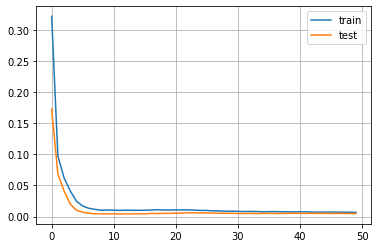

In [ ]:
plot_process(process)

**ОЦЕНКА РАБОТЫ МОДЕЛИ**

In [ ]:
def prediction(model,test_x,train_x, df):
    # Predict using the model
    predict =  model.predict(test_x)

    # Reshape test_x and train_x for visualization  and inverse-scaling purpose
    test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[2]))

    # Concatenate test_x with predicted value
    predict_ = np.concatenate((test_x, predict),axis = 1)

    # Inverse-scaling to get the real values
    predict_ = scaler.inverse_transform(predict_)
    original_ = scaler.inverse_transform(test)

    # Create dataframe to store the predicted and original values
    pred = pd.DataFrame()
    pred['dt'] = df['dt'][-test_x.shape[0]:]
    pred['Original'] = original_[:,-1]
    pred['Predicted'] = predict_[:,-1]

    # Calculate the error 
    pred['Error'] = pred['Original'] - pred['Predicted']
    
    # Create dataframe for visualization
    df = df[['dt','AverageTemperature']][:-test_x.shape[0]]
    df.columns = ['dt','Original']
    original = df.append(pred[['dt','Original']])
    df.columns = ['dt','Predicted']
    predicted = df.append(pred[['dt','Predicted']])
    original = original.merge(predicted, left_on = 'dt',right_on = 'dt')
    return pred, original

In [ ]:
pred, original = prediction(model, test_x, train_x, df_Vietnam_monthly)

In [ ]:
def plot_error(df):

    # Plotting the Current and Predicted values
    fig = px.line(title = 'Prediction vs. Actual')
    fig.add_scatter(x = df['dt'], y = df['Original'], name = 'Original', opacity = 0.7)
    fig.add_scatter(x = df['dt'], y = df['Predicted'], name = 'Predicted', opacity = 0.5)
    fig.show()

    fig = px.line(title = 'Error')
    fig = fig.add_scatter(x = df['dt'], y = df['Error'])
    fig.show()

In [ ]:
def plot(df):
    # Plotting the Current and Predicted values
    fig = px.line(title = 'Prediction vs. Actual')
    fig.add_scatter(x = df['dt'], y = df['Original'], name = 'Original', opacity = 0.7)
    fig.add_scatter(x = df['dt'], y = df['Predicted'], name = 'Predicted', opacity = 0.5)
    fig.show()

In [ ]:
plot(original)

In [ ]:
plot_error(pred)